<a href="https://colab.research.google.com/github/agarwalpratik/aws-codepipeline-s3-codedeploy-linux/blob/master/1_Data_Distribution_and_Outlier_Handling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv('retail_dataset.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Monthly_Sales            105 non-null    float64
 1   Customer_Feedback_Score  105 non-null    float64
dtypes: float64(2)
memory usage: 1.8 KB


In [4]:
#Get the statistical summary of a numerical column

#Adjust the display settings for numerical value
pd.set_option('display.float_format','{:.2f}'.format)

data.describe()

,Monthly_Sales,Customer_Feedback_Score
count,105.00,105.00
mean,5185.65,3.29
std,1155.88,1.77
min,3690.13,1.02
25%,4718.86,1.98
50%,4982.09,3.19
75%,5305.84,3.91
max,9983.87,9.94


In [8]:
data['Monthly_Sales'].mean()

5185.651854991164

In [9]:
data['Customer_Feedback_Score'].mean()

3.287965869465705

<ipython-input-10-8131ece537fa>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Monthly_Sales'])


<Axes: xlabel='Monthly_Sales', ylabel='Density'>

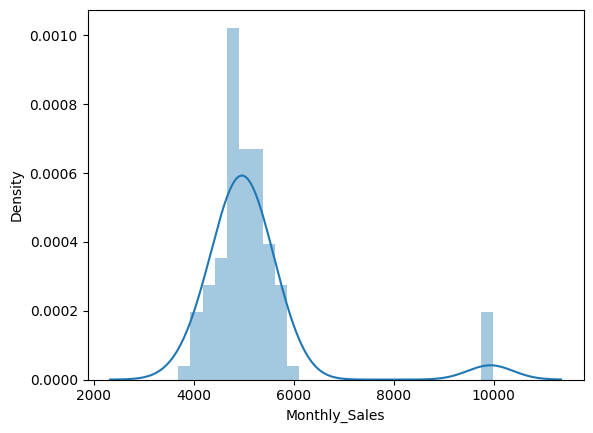

In [10]:
#Visual EDA --- Here you are using GRAPHS as a medium to perform Descriptive Stats
sns.distplot(data['Monthly_Sales'])

<ipython-input-11-fdca59e08624>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Customer_Feedback_Score'])


<Axes: xlabel='Customer_Feedback_Score', ylabel='Density'>

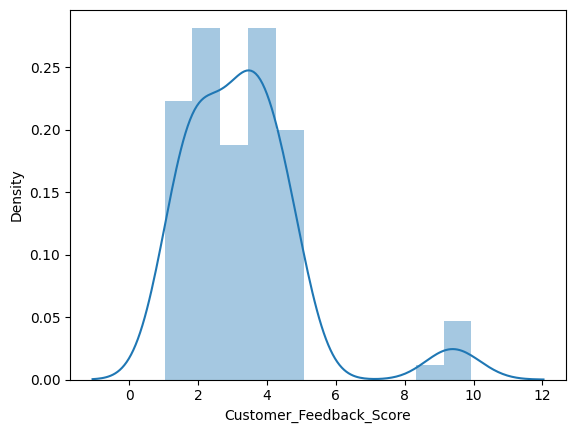

In [11]:
sns.distplot(data['Customer_Feedback_Score'])

In [13]:
#Goal: Identify the extreme values and remove the same
# To identify extreme value we need to identify the range
# To identify the range, we will use 1.5 IQR rule (Tukey's Method)

def outlierDetection(column):
  #1. Sort the data in ascending order
  sorted(column)

  #2. Calc Q1 and Q3
  Q1,Q3 = np.percentile(column,[25,75])

  #3. Calc IQR
  IQR = Q3 - Q1

  #4. Calc Valid Range
  lowerRange = Q1 - (1.5 * IQR)
  upperRange = Q3 + (1.5 * IQR)

  return lowerRange,upperRange

In [15]:
lr_ms,ur_ms = outlierDetection(data['Monthly_Sales'])

In [16]:
lr_fs,ur_fs = outlierDetection(data['Customer_Feedback_Score'])

In [17]:
lr_ms

3838.3833718181318

In [18]:
ur_ms

6186.311007981816

In [19]:
lr_fs

-0.9294016578803217

In [20]:
ur_fs

6.818225625844095

In [22]:
#Delete Outliers

processedData_ms = data[(data['Monthly_Sales'] >= lr_ms) & (data['Monthly_Sales'] <= ur_ms)]

In [23]:
processedData_ms.describe()

,Monthly_Sales,Customer_Feedback_Score
count,99.00,99.00
mean,4960.78,2.98
std,438.16,1.14
min,4006.22,1.02
25%,4709.27,1.97
50%,4942.18,3.08
75%,5218.10,3.83
max,5926.14,4.94


In [24]:
processedData_fs = data[(data['Customer_Feedback_Score'] >= lr_fs) & (data['Customer_Feedback_Score'] <= ur_fs)]

In [25]:
processedData_fs.describe()

,Monthly_Sales,Customer_Feedback_Score
count,100.00,100.00
mean,4948.08,2.98
std,454.08,1.14
min,3690.13,1.02
25%,4699.55,1.97
50%,4936.52,3.10
75%,5202.98,3.82
max,5926.14,4.94


<ipython-input-26-413b3b32f673>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(processedData_fs['Customer_Feedback_Score'])


<Axes: xlabel='Customer_Feedback_Score', ylabel='Density'>

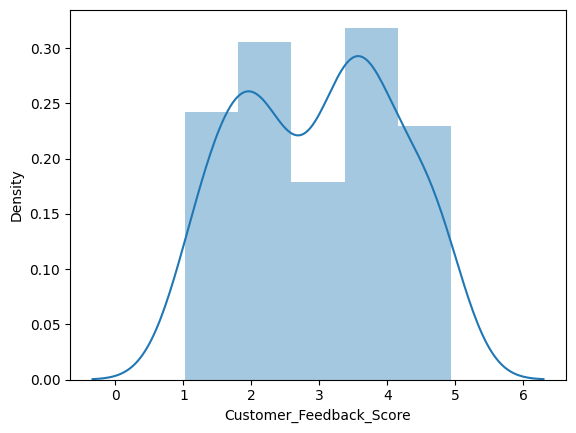

In [26]:
sns.distplot(processedData_fs['Customer_Feedback_Score'])

<ipython-input-27-b10b03dabc74>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(processedData_ms['Monthly_Sales'])


<Axes: xlabel='Monthly_Sales', ylabel='Density'>

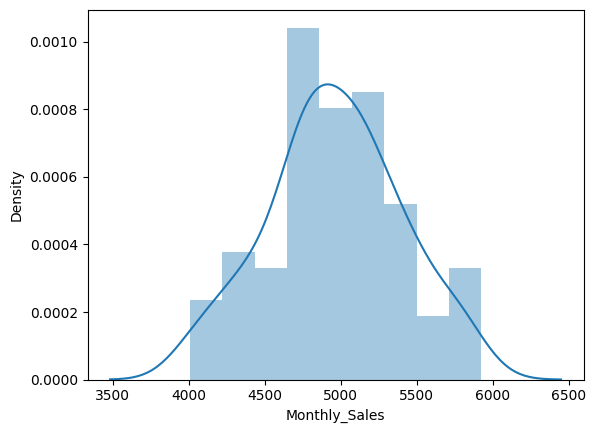

In [27]:
sns.distplot(processedData_ms['Monthly_Sales'])